# Python | sleep

### Importance
Sometimes it is needed to create an intentional delay in the executions of a program.
For example, you may need to stop the execution of a thread, until some other executions are completed.
The other scenarios that may need to stop the program for a specific period of time include dealing with timers, games, etc. 

### Scope of this tutorial
In this tutorial, we discuss the **Python sleep function**. 
We will start with a brief introduction, followed by discussing the following closely-related terms/functions from the **Python time module**:<br>
\- epoch term<br>
\- time function<br>
\- gmtime function<br>
\- ctime function<br>

At the end, we will discuss 
the Python sleep time accuracy.
In order to see how accurate the Python sleep function really is,
we develop a small Python code snippet and visualize the actual sleep time over a wide range of target sleep time.


# Python time module

The Python **time** module provides useful time-related functionalities. 
The way that the _time module_ deals with the concept of time is by comparing a given time object with a reference called _epoch_ as explained in the following.

## What is _epoch_ in Python time module?

The _epoch_ refers to the point where the time is assumed to have started, and consequently is platform-dependent. 
On Windows and most Unix systems, the [epoch is January 1, 1970, 00:00:00 (UTC)](https://docs.python.org/3/library/time.html).
In the following, you will learn how to figure out what the epoch is for your platform.

### Python _time_ function from time module
As mentioned earlier, the _time_ module measures the time with respect to a reference, _i.e. epoch_.
The function _time_ from the _time_ module returns the total number of elapsed seconds since the epoch.
Let's see the following example.

In [1]:
import time

elapsed_time = time.time()
print(f'Total number of elapsed seconds since the epoch: {elapsed_time}')

But, how to convert the _total number of elapsed seconds since the epoch_ into a more common time format, e.g. year, month, day, and hour?

### Python _gmtime_ function from time module
The Python _gmtime_ function can be used to convert a time expressed as the total number of elapsed seconds since the _epoch_ to a time value sequence called "struct_time".
You can think of _gmtime_ as _give me time!_
Hence, a cool thing you can do is to pass 0 to the _gmtime_ function to find out what the epoch is on your platform:

In [2]:
time.gmtime(0)

time.struct_time(tm_year=1970, tm_mon=1, tm_mday=1, tm_hour=0, tm_min=0, tm_sec=0, tm_wday=3, tm_yday=1, tm_isdst=0)

So, the _epoch_ for my platform turns out to be January 1, 1970, 00:00:00 (UTC).

In order to convert the total number of elapsed seconds since the epoch into a more common time format, you can pass the return value of _time()_ function to the _gmtime()_ function as shown in the following:

In [3]:
time.gmtime(time.time())

time.struct_time(tm_year=2021, tm_mon=12, tm_mday=15, tm_hour=7, tm_min=1, tm_sec=58, tm_wday=2, tm_yday=349, tm_isdst=0)

Which shows the time (UTC) of writing this article!

### Python _ctime_ function from time module

The Python _ctime_ function converts a time expressed as the total number of elapsed seconds since the epoch to a human-readable string of a form: 'Wed Dec 31 18:00:00 1969' representing **local time**. 

For example:

In [4]:
time.ctime(0)

'Wed Dec 31 18:00:00 1969'

represents my _epoch_ in local time (CST).

Note that if no argument is passed to the _ctime_ function, the return value of the _time()_ function is used, _i.e._ the total number of elapsed seconds since the epoch.
As a result, the function _ctime()_ with no argument will return the human-readable string representation of the current local time:

In [5]:
time.ctime()

'Wed Dec 15 01:01:58 2021'

# Python sleep function

The **Python sleep() function** stops the execution of the calling thread for a specific time interval (in terms of second).
The argument passed to the function does not have to be an integer necessarily; it can be a floating point number for specifying the sleep time precisely. 

Let's look at some examples.

## Python sleep function | example #1

In the following example, we use a loop, inside which we print the current time as well as calling the Python sleep function, with an argument equal to 1, to stop the execution of the program for 1 sec. 

In [6]:
for sn in range(10):
    # print the current local time
    print(time.ctime())
    
    #---------------------------------
    #Python time sleep function to 
    #send Python to sleep for 1 sec!!!
    #---------------------------------
    time.sleep(1)

Wed Dec 15 01:01:58 2021
Wed Dec 15 01:01:59 2021
Wed Dec 15 01:02:00 2021
Wed Dec 15 01:02:01 2021
Wed Dec 15 01:02:02 2021
Wed Dec 15 01:02:03 2021
Wed Dec 15 01:02:04 2021
Wed Dec 15 01:02:05 2021
Wed Dec 15 01:02:06 2021
Wed Dec 15 01:02:07 2021


As you may have guessed it correctly, this code snippet prints the current time in each iteration, which is 1 second different from that of the adjacent iterations because of using python sleep function: _time.sleep(1)_.

## Python sleep function | example #2

In the following example, we use a similar code snippet, except that 1. we print the current time expressed as the total elapsed seconds since the epoch and 2. we use a shorter sleep time of 0.1 sec.
Let's see how it works this time:

In [7]:
for sn in range(10):
    print('{:.6f}'.format(time.time()))
    
    #Python time sleep function
    time.sleep(0.1)

1639551728.127201
1639551728.227957
1639551728.328596
1639551728.429377
1639551728.529554
1639551728.630052
1639551728.731467
1639551728.831756
1639551728.932067
1639551729.035694


It turns out the difference between the consecutive times is slightly (about 1 millisecond) more than the sleep time of 0.1 sec (100 milliseconds).
Is my computer that slow?!! Well, it turns out many factors play role in such discrepancies. Feel free to check out this [informative thread](https://stackoverflow.com/questions/1133857/how-accurate-is-pythons-time-sleep) on the Python sleep time accuracy.

# Python sleep time accuracy

The following code snippet is developed to get more insight into the accuracy of **Python time sleep** function.

In [8]:
import numpy as np

# number of data points for each experiment
num_data_points = 5

# smallest, largest, and increment of target sleep time in millisecond
ti = 1
tf = 100
dt = 1

target_sleep_time = np.arange(ti,tf,dt)
actual_sleep_time = np.empty((len(target_sleep_time), num_data_points))
target_sleep_time = np.arange(ti,tf,dt)/1000
for sn_exp, this_sleep_time in enumerate(target_sleep_time):
    for sn_data_point in range(num_data_points):
        time_start = time.time()
        
        #Python time sleep function
        time.sleep(this_sleep_time)
        
        time_end = time.time()
        actual_sleep_time[sn_exp, sn_data_point] = (time_end - time_start)

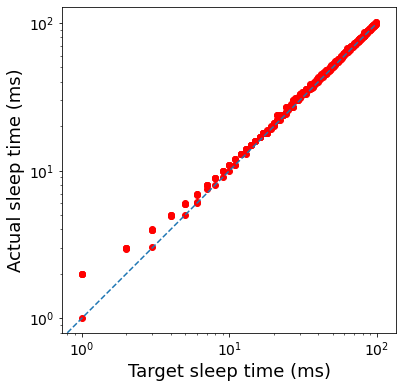

In [9]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6,6), facecolor=(1,1,1))
ax.plot(target_sleep_time*1000, actual_sleep_time*1000, 'ro');
ax.plot(np.arange(tf), np.arange(tf), '--')
ax.axis('equal')
ax.tick_params(axis='x', which='major', labelsize=14)
ax.tick_params(axis='y', which='major', labelsize=14)
ax.set_xlabel('Target sleep time (ms)', fontsize=18)
ax.set_ylabel('Actual sleep time (ms)', fontsize=18)

#-----------------------------------
# Feel free to adjust the format
#-----------------------------------
#ax.set_xlim(1,100)
#ax.set_ylim(1,100)
ax.set_xscale('log')
ax.set_yscale('log')

plt.savefig('sleep_time_01.png')
plt.show()

The characteristic curve shows that the Python time sleep function has about 1 millisecond inaccuracy on my system. Please, note that the results may vary from one machine to another.

# Summary

In this tutorial, we discussed some of the basics of **Python time module**. 
In particular we introduced the concept of _epoch_ as well as the functions _time_, _gmtime_, _ctime_, and _sleep_.
We also ran an experiment 
to examine the Python sleep time accuracy. 
It turned out that the Python sleep time has about 1 millisecond inaccuracy on my system, but we emphasized that it is platform-dependent and can vary from one machine to another.

Hopefully, this tutorial was able to help you with some of the basics of Python. 
Feel free to check out the rest of the articles on [SoarDeepSci](https://soardeepsci.com/blog/).